In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Bring in the data

train_df = pd.read_csv('obesity/train.csv', index_col= 0)
test_df = pd.read_csv('obesity/test.csv', index_col= 0)

In [3]:
train_df.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test_df.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.0,Sometimes,Public_Transportation


In [5]:
# See the shape and columns of the train_df

print(train_df.shape)
train_df.columns.tolist()

(20758, 17)


['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [6]:
# Compares shapes and sizes of both the train and test data

print(f"Train data: {train_df.shape}")
print(f"Test data: {test_df.shape}")

data_percentage = np.round(train_df.shape[0]/(train_df.shape[0] + test_df.shape[0]), 4)
print(f"{data_percentage * 100}% of all data is training data")
print(f"{(1-data_percentage) * 100}% of all data is test data")

Train data: (20758, 17)
Test data: (13840, 16)
60.0% of all data is training data
40.0% of all data is test data


In [7]:
# Describing the training data

train_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
# Any nulls?

print("Train")
train_df.isna().sum()

Train


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
# What about the test data?

print("Test")
test_df.isna().sum()

Test


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [10]:
# Let's see the data types of the training data

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13840 entries, 20758 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             1

Gender
Female    10422
Male      10336
Name: count, dtype: int64 




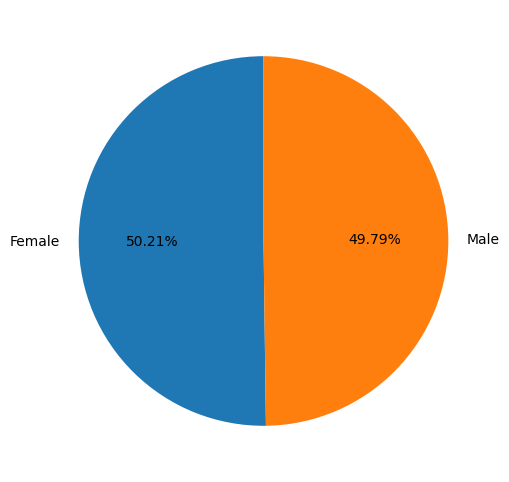

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64 




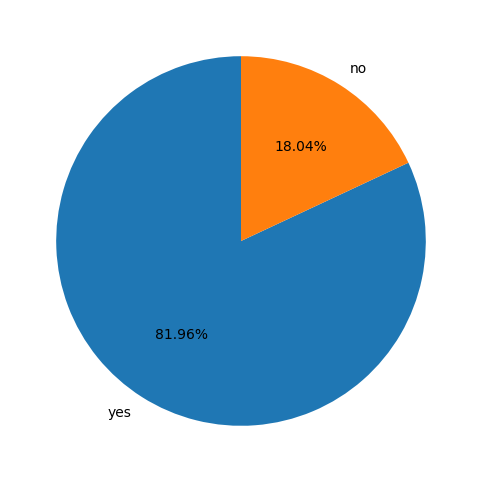

FAVC
yes    18982
no      1776
Name: count, dtype: int64 




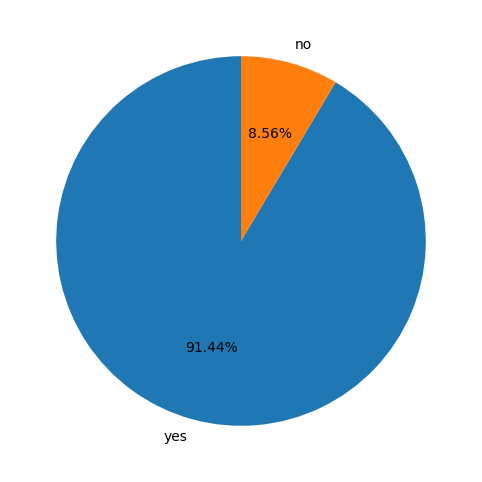

SMOKE
no     20513
yes      245
Name: count, dtype: int64 




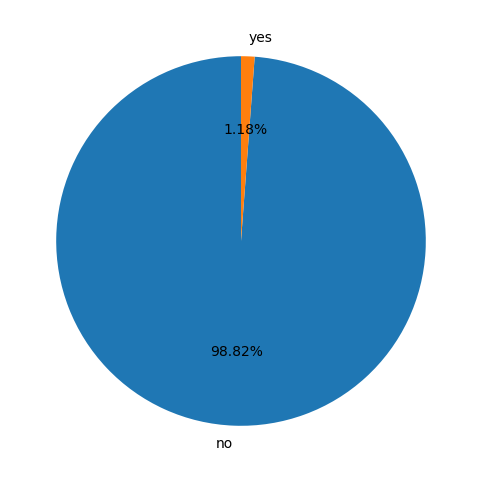

SCC
no     20071
yes      687
Name: count, dtype: int64 




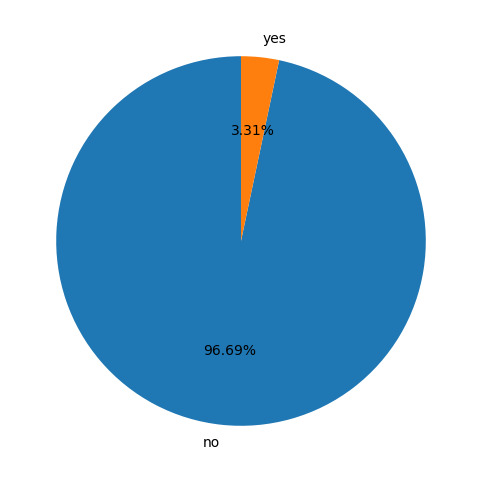

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64 




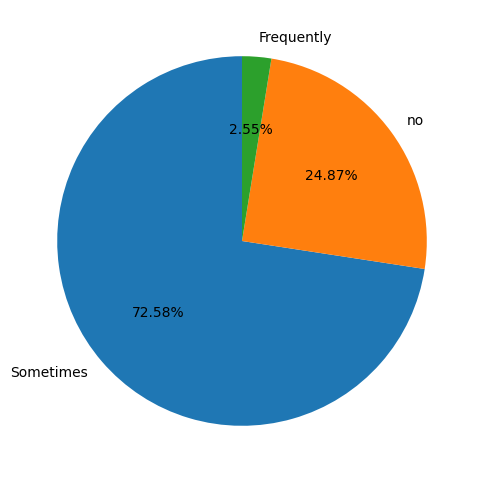

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64 




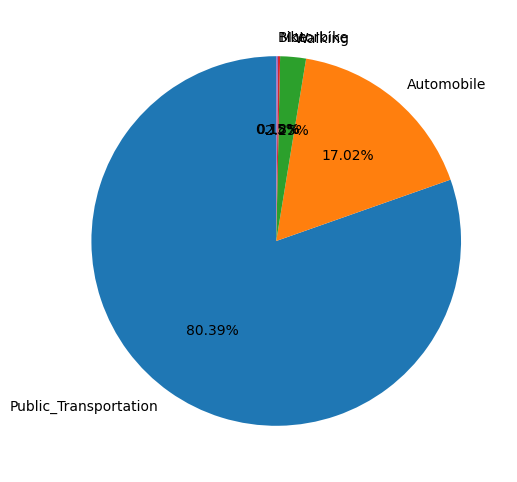

In [11]:
# Pie charts for each categorical features

for feature in ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']:
    plt.figure(figsize=(12, 6))
    aggregation = train_df[feature].value_counts()
    print(aggregation, '\n\n')
    plt.pie(x=aggregation, labels=aggregation.index, autopct='%1.2f%%', startangle=90)
    plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

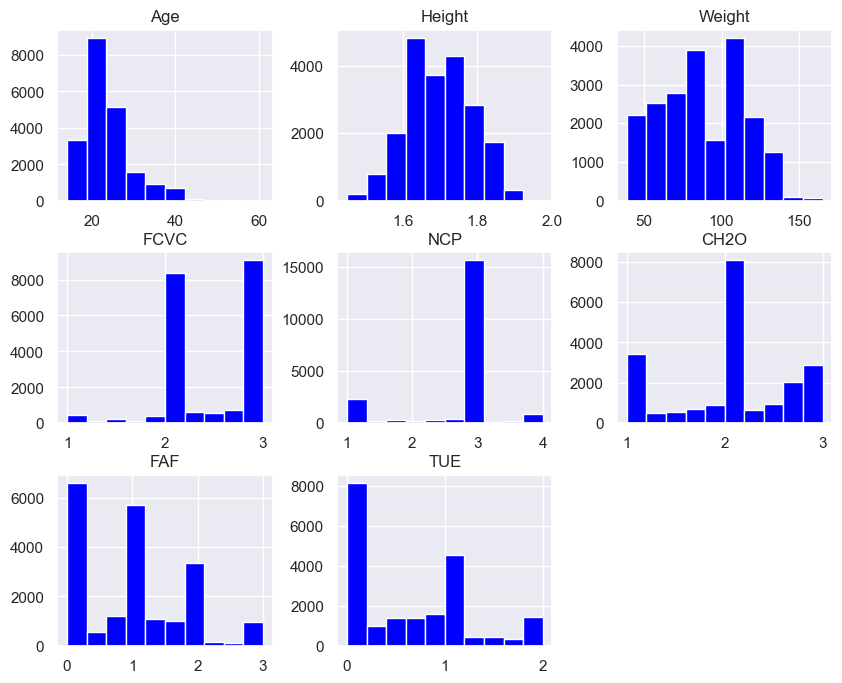

In [12]:
# Histograms of all of the numerical categories

sns.set_theme(rc={'figure.figsize': (10, 8)})
train_df.hist(color='blue')

In [32]:
# Create encoding function

def encode(dataframe, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        if column in dataframe.columns:
            mapped_values = label_encoder.fit_transform(dataframe[column])
            dataframe[f"{column}_encoded"] = mapped_values
            dataframe.drop(column, axis=1, inplace=True)  # Drop the original column
            dataframe.rename(columns={f"{column}_encoded": column}, inplace=True)  # Rename the encoded column

        else:
            print(f"Column '{column}' not found in the DataFrame.")

    return dataframe

In [36]:
# Encode the training data

train_encoded_df = encode(train_df, ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC', 'MTRANS','NObeyesdad'])

train_encoded_df.head(1)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,CAEC,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.66995,2.0,2.983297,2.763573,0.0,0.976473,1,1,1,0,0,2,1,3,6


<Axes: >

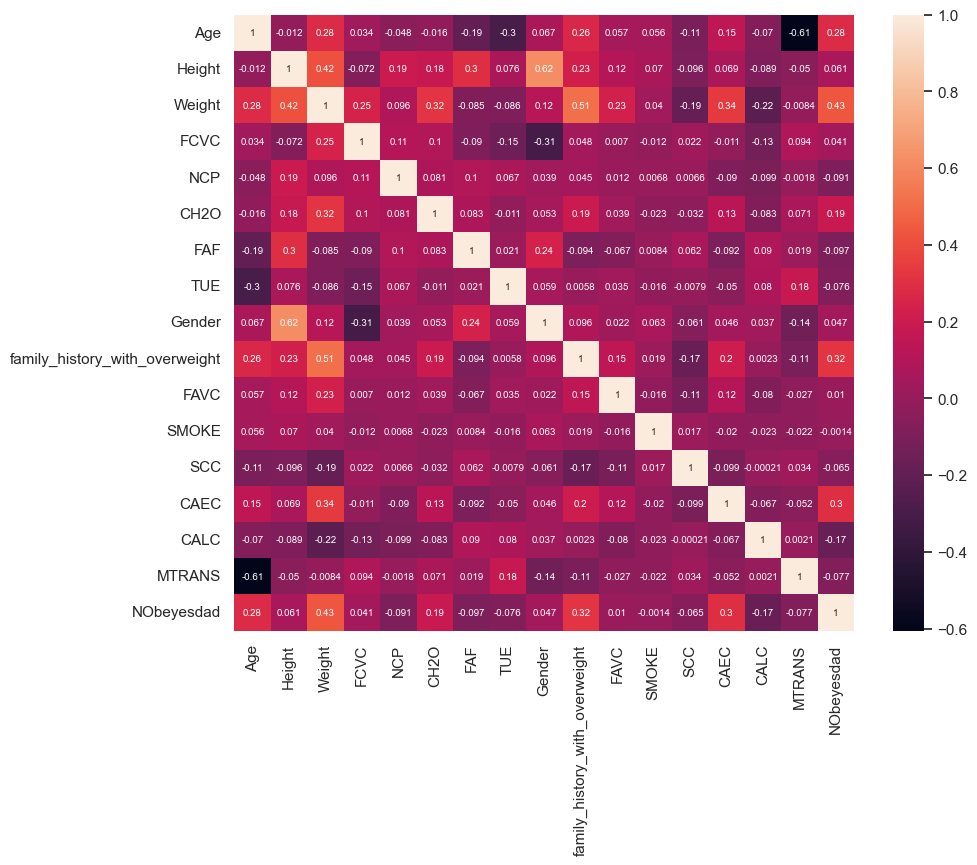

In [38]:
# Correlation Matrix of features

sns.heatmap(train_encoded_df.corr(), annot= True, annot_kws={"fontsize":7})